<a href="https://colab.research.google.com/github/leticiaplang/lpl_posts/blob/master/_notebooks/2022_03_14_drug_classification_pt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# pt-BR | Drug Classification
> "Limpeza de dados, transformação de dados, insights para o negócio, algorítimo de classificação."

- toc: false
- branch: master
- badges: true
- comments: false
- categories: [notebook, análise de dados, ciência de dados]
- hide: false
- author: leticiaplang

# Drug Classification

## Problema de Negócio

Uma das grandes dores dos serviços de saúde são os erros relacionados a medicamentos. De acordo com o artigo de Rayhan A. e colegas, os erros de pescrição 
e solicitação englobam 50% dos erros totais relacionamentos a medicamentos. O dano não ocorre apesas ao paciente, familiar ou aos profissionais, mas também à própria empresa, uma vez que são estimados gastos maiores a 40 bilhões de dólares por ano para o cuidado desses pacientes. Este algoritmo é o primeiro passo para a construção de um MVP (produto mínimo viável) visando auxílio para prescrição de medicamentos segura. Após, será realizada análise de dose, juntamente com a análise em uma amostra de tamanho maior.


## Visão Geral

* Este dataset foi retirado do Kaggle e você pode acessá-lo clicando [aqui](https://www.kaggle.com/prathamtripathi/drug-classification). 

* Este dataset engloba dados demográficos, condições de saúde (análise de exames laboratorias) e o tratamento precrito.

* O objetivo deste projeto é preizer qual droga deverá ser utilizada baseado nos atributos.

* Foi possível retirar alguns insights analisando os atributos 

* O algoritmo de classificação foi necessário para garantir a acurácia do resultado.

* O algoritmo de base utilizado com o Dummie classifier. 

* O algoritmo com melhor desempenho foi o de regressão logística. Pode ser utilizado como MVP.

* Próximos passos é realizar o tuning do modelo e features.

## Estrutura do Notebook (código em inglês)

* Preparando o ambiente
  - Instalações
  - Importações
  - Requisitos
  - Importação do dataset e transformação dele em dataframe
* Exploração do dataframe
  - Característica do dataframe
  - Transformações
  - Anaálise exploratória
  - Distribuição e balanceamento
  - análise de outlier
* Insights de negócio
* Modelagem
  - Engenharia de atributos
  - Definição de funções 
  - Criando cenários
  - Testando os cenários
* Conclusão e próximo passos
* Referências

## Preparando o ambiente

In [ ]:
# Import
from google.colab import drive

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

In [ ]:
# Acess the dataset by google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Create the dataframe
## Put your path here
df = pd.read_csv('drive/MyDrive/datasets/drug200.csv', sep = ',')

In [ ]:
# Check the output
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


## Explorando o dataframe

In [ ]:
# DF rows and columns
df.shape

(200, 6)

🔶 Possui 200 linhas e 6 colunas

In [ ]:
# Types & null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
# Duplicated data
df.duplicated().sum()

0

🔶 Não foram identificados dados inconsistentes

In [ ]:
# Infos by columns 
df['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [ ]:
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [ ]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

  
🔶 As variáveis categóricas são:
   - Sex | sexo: F(feminino), M(masculino)
   - Blood Pressure Levels (BP) | pressão arterial: normal, low/baixa, high/alta
   - Cholesterol Levels | colesterol: normal, high/alto | exame de sangue
   - Drug | droga: a, b, c, x, y

In [ ]:
# Basic statistics
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


🔶 As variáveis numéricas são: 
   - Age | idade: 15 to 74 anos
   - Na to Potassium Ratio | razão sódio e potássio: 6.269 - 38.247 mEq/24 horas | Exame de urina | Altas razão significa consumo elevado de Sodio e menor de Potássio.


### Transformações

In [ ]:
# Columns name
df.columns = df.columns.str.lower()

In [ ]:
# Columns data
col = ['sex', 'bp', 'cholesterol', 'drug']

In [ ]:
# Lowercase transformation
for n in col:
  df[n] = df[n].apply(lambda x: x.lower())

🔶  Texto transformado para letra minúscula


In [ ]:
# Drug essencial information
df['drug'] = [n[-1] for n in df['drug']]

In [ ]:
df.head()

,age,sex,bp,cholesterol,na_to_k,drug
0,23,f,high,high,25.355,y
1,47,m,low,high,13.093,c
2,47,m,low,high,10.114,c
3,28,f,normal,high,7.798,x
4,61,f,low,high,18.043,y


🔶  Deletada a palavra 'drug' dos valores da coluna drug

## Análise Exploratória

### Distribuição & Outlier


In [ ]:
# Defining the variables
continuous_var = ['age', 'na_to_k']
categorical_var = ['sex', 'bp', 'cholesterol', 'drug']

# Ignoring warning text
warnings.filterwarnings("ignore")

##### Variáveis contínuas

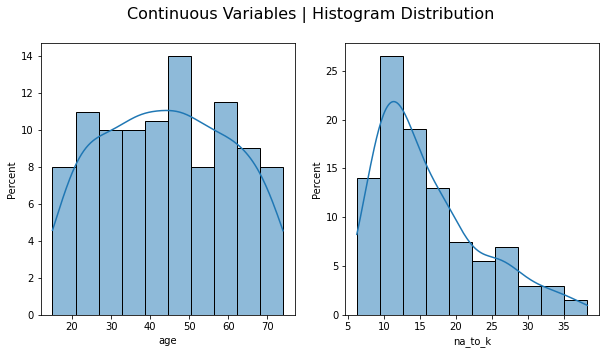

In [ ]:
# General distribution | histogram for which variable
n_rows=1
n_cols=2

## Creating subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(10, 5)
fig.suptitle('Continuous Variables | Histogram Distribution', fontsize=16)

## Creating histograms
for i, column in enumerate(continuous_var):
  sns.histplot(df[column], ax=axes[i%n_cols], bins=10,  stat="percent", kde=True)

plt.show()

🔶 Age | idade - distribuição mais próxima de normal

🔶 Na to K - assimetria à direita com presença de outliers

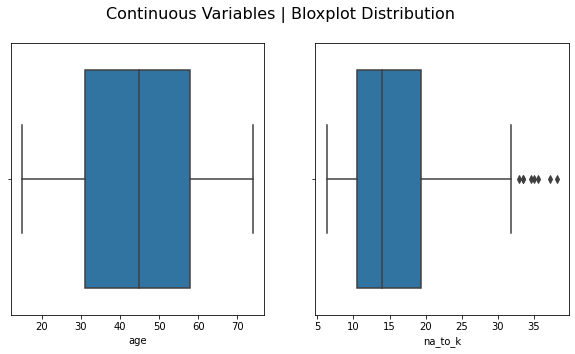

In [ ]:
# General distribution | boxplot for which variable
n_rows=1
n_cols=2

## Creating subplots
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(10, 5)
fig.suptitle('Continuous Variables | Bloxplot Distribution', fontsize=16)

## Creating boxplot
for i, column in enumerate(continuous_var):
  sns.boxplot(df[column], ax=axes[i%n_cols])

plt.show()

🔶 Na to K com outliers e mediana aproximada de 14 mEq/24 horas

🔶 Age | idade sem outliers e mediana aproximada de 45 anos

In [ ]:
# analysing outliers >> high na_to_k == drug Y(?)
def outliers(df,col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  return df[((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]

In [ ]:
outliers(df, 'na_to_k')

,age,sex,bp,cholesterol,na_to_k,drug
24,33,f,low,high,33.486,y
96,58,f,low,high,38.247,y
98,20,m,high,normal,35.639,y
128,47,m,low,normal,33.542,y
131,52,m,low,normal,32.922,y
184,18,f,high,high,37.188,y
188,65,m,high,normal,34.997,y
194,46,f,high,high,34.686,y


🔶 Outlier parece estar associado ao uso da droga Y

#### Categorical variables

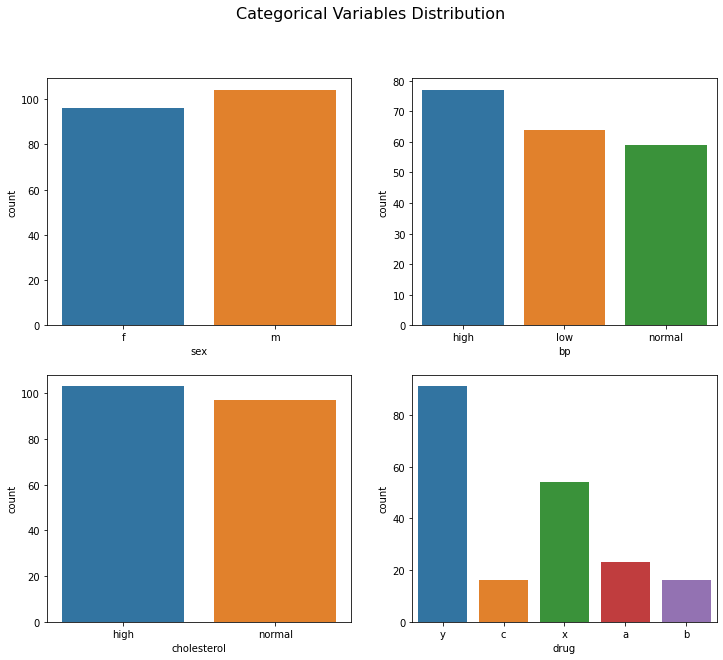

In [ ]:
# General distribution | countplot for which variable
n_rows=2
n_cols=2
warnings.filterwarnings("ignore")

## Creating subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(12, 10)
fig.suptitle('Categorical Variables Distribution', fontsize=16)

## Creating boxplot
for i, column in enumerate(categorical_var):
  sns.countplot(df[column], ax=axes[i//n_cols,i%n_cols])

plt.show()

🔶 Dados categóricos desbalanceados, especialmente nos dados por grupo de drogas

### Insights de negócio

* É possível prescrever corretamente as drogas?

Overview:

              || Drug A | Drug B | Drug C | Drug X | Drug Y |

      |  Age  ||  < 50  |  > 50  |        |        |        |
      |  Sex  ||        |        |        |        |        |
      |  BP   ||  high  |  high  |  low   |norm/low|        |
      |  Chol ||        |        |  high  |        |        |
      |  Na_K ||  < 15  |  < 15  |  < 15  |  < 15  |  > 15  |

In [ ]:
# Grouping the features
cont_feature = ['age', 'na_to_k']
cat_feature = ['sex', 'bp', 'cholesterol']


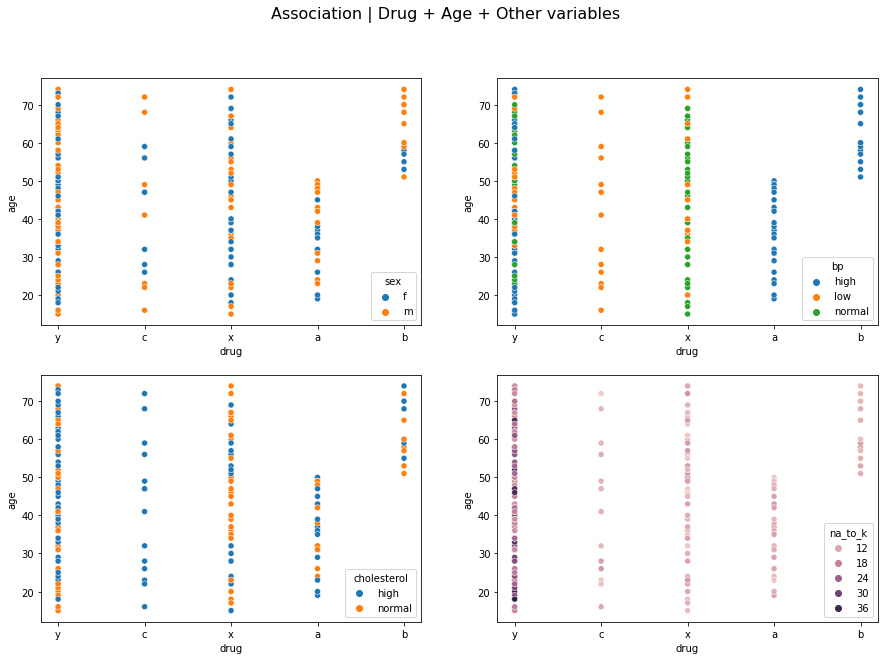

In [ ]:
# Analysing target and age with others variables
n_rows=2
n_cols=2
X = 'drug'
Y = 'age'
H = ['sex', 'bp', 'cholesterol', 'na_to_k']

## Subplots
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(15, 10)
fig.suptitle('Association | Drug + Age + Other variables', fontsize=16)

for i, H in enumerate(df[H]):
  sns.scatterplot(x=X, y=Y, hue=H, data=df, ax=axs[i//n_cols,i%n_cols])

plt.show()

🔶 Age | idade: 
* Droga A utilizada para menores de 50 anos
* Droga B utilizada para maiores de 50 anos

🔶 BP | pressão arterial: 
* Droga A e droga B para pessoa com pressão alta
* Droga C para pessoas com pressão normal
* Droga X para pessoas com pressão normal ou baixa 

🔶 Cholesterol | colesterol:
* Uso de C para pessoas com colesterol elevado

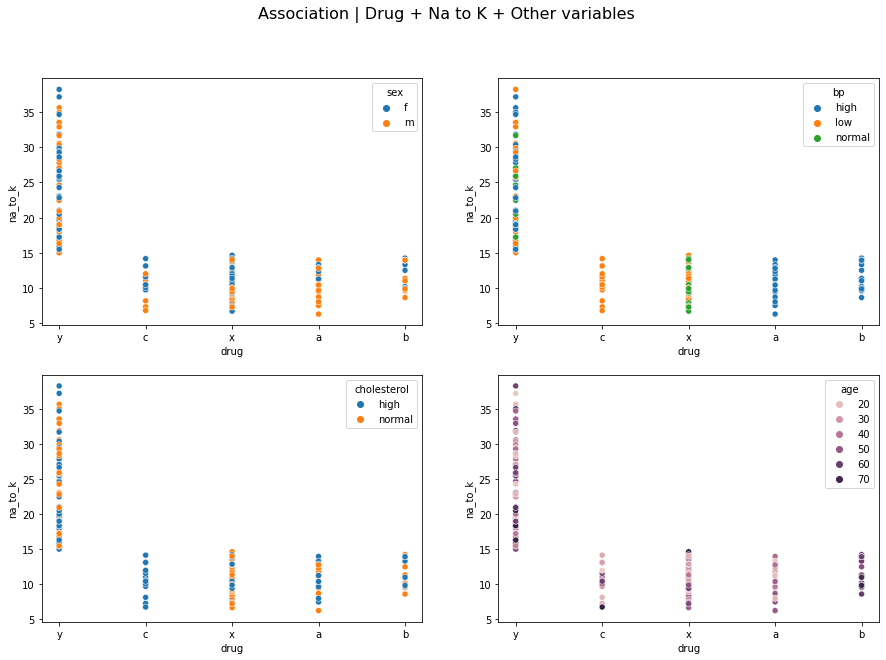

In [ ]:
# Analysing target and na_to_k with others variables
n_rows=2
n_cols=2
X = 'drug'
Y = 'na_to_k'
H = ['sex', 'bp', 'cholesterol', 'age']

## Subplots
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(15, 10)
fig.suptitle('Association | Drug + Na to K + Other variables', fontsize=16)

for i, H in enumerate(df[H]):
  sns.scatterplot(x=X, y=Y, hue=H, data=df, ax=axs[i//n_cols,i%n_cols])

plt.show()

🔶 Na to K:
* Droga Y utilizada se razão for maior que 15mEq/24 horas

🔶 Sexo: Feature não relevante?

## Modelagem
* Os insights não permitiram definir com precisão quais drogas podem ser utilizadas conforme os atributos, logo irei proceguir com construção de modelos de classficação.
* São problemas de classificação supervisionada, quando queremos que o algoritmo preveja determinadas categorias a partir de algumas características. 
* No caso, as categorias são os tipos de tratamento prescrito (droga a, b, c, x ou y) e as característica são os atributos abaixo.

🔶 Alvo: 
* Drug | droga

🔶 Atributos numéricos contínuos: 
* Age | idade 
* Na_to_K | razão Na e K

🔶 Atributos categóricos: 
* Sex | sexo
* BP | pressão arterial
* Cholesterol | colesterol

#### Engenharia de atributos
* Como temos dados categóricos, é necessário que realizemos a transformação do texto para valores numéricos. Isso favorece o aprendizado de máquina, uma vez que a linguagem dela é binária(0 e 1).

In [ ]:
# Label enconding

## Variables
le = LabelEncoder()
bp = ['low', 'normal', 'high'] #To define the label order
chol = ['normal', 'high'] #To define the label order


## Fit transform | columns sex & drug
for c in ['sex', 'drug']:
  df[c] = le.fit_transform(df[c])
  
## fit transform | column blood pressure
le.fit(df['bp'])
le.classes_ = np.array(bp) #Specifying the label order
df['bp'] = le.transform(df['bp'])

## fit transform | column cholesterol
le.fit(df['cholesterol'])
le.classes_ = np.array(chol) #Specifying the label order
df['cholesterol'] = le.transform(df['cholesterol'])


In [ ]:
df.head()

,age,sex,bp,cholesterol,na_to_k,drug
0,23,0,2,1,25.355,4
1,47,1,0,1,13.093,2
2,47,1,0,1,10.114,2
3,28,0,1,1,7.798,3
4,61,0,0,1,18.043,4


🔶 Transformação dos dados categóricos em números sequenciais de 0 a 4 com label enconder.

              |  sex  |  drug  |   bp   | cholesterol |
            0 |   f   |    a   |  low   |    normal   |
            1 |   m   |    b   | normal |     high    |
            2 |       |    c   |  high  |
            3 |       |    x   |
            4 |       |    y   |

### Definção das funções

In [ ]:
# Creating a function which create scenarios with all situations defined

def create_scenarios(features, algorithm):
  ''' It combines de list of strings from variables to create 
  differents scenarios to run de model.
  Input: variables separated by coma. Each variable contains a list of strings.
        if there are no situation in some variable, insert 'none'. 
  Output: a variable called 'scenarios' which contains a list of dictionary. '''

  # Creating scenarios/combinations
  global scenarios 
  scenarios = []
  for f in features:
    for a in algorithm:
      scenario = {'features': f,
                  'algorithm': a,
                 }
      scenarios.append(scenario)
  print(f'There are {len(scenarios)} possible scenarios.')

🔶 A função cenários permite a criação de todos as situações possíveis de modelagem por meio da combinação de variáveis definidas. 

🔶 Podemos inserir transformações e algoritmos conforme necessidade (features, scalling, outlier, rebalance, algorithm). 

🔶 Ela irá retornar uma lista de dicionário com todos os cenários e realizará uma visualização do número total de combinações geradas.

In [ ]:
## Creating a function which runs the functions for each scenario

def run_model(df, scenario, target):
  '''
  Function to run the selected scenario.
  Input: dataframe,
         variable 'scenario'
  Output: return the scenario analysed and the metrics.
  '''
  results = []

  # Running each scenario
  for n in range(5000):  
    if scenario['features'] == 'all':
      dft = df

    ## Split train & test0
    X = dft.drop(columns = target)
    y = dft[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    ## algorithm
    if scenario['algorithm'] == 'dummy':
      model = DummyClassifier()
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
    elif scenario['algorithm'] == 'logistic':
      model = LogisticRegression() 
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
    elif scenario['algorithm'] == 'knn':
      model = KNeighborsClassifier()
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
    elif scenario['algorithm'] == 'tree_clas':
      model = DecisionTreeClassifier()
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
    elif scenario['algorithm'] == 'random':
      model = RandomForestClassifier()
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)

    ## Metrics & append
    results.append({'Scenario': scenario,
                    'Accuracy': accuracy_score(y_test, y_pred), 
                    'Precision': precision_score(y_test, y_pred, average='weighted'),
                    'Recall': recall_score(y_test, y_pred, average='weighted'),
                    'F1-score': f1_score(y_test, y_pred, average='weighted')})
  return results


🔶 A função de rodar os cenários permite que as transformações ou os algoritmos possam rodar conforme as variações de cada cenário/situação. 

🔶 Devemos definir o cenário que queremos analisar e a função rodará 5000 vezes o mesmo cenário, com diferentes pontos de partida.

🔶 Devemos inserir a variável que contém o dataframe, o cenário escolhido e o alvo que queremos predizer.

🔶 Ela irá retornar uma lista de dicionários contendo o cenário e as métricas de performance (acurácia, precisão, recall e F1-score)

🔶 Acurácia nos dará o quanto o algoritmo acertou a sua previsão considerando positivos e negativos. No cálculo analisa-se todas as previsões corretas(positivo/TP e negativos/TN) sobre todos os resultados (positivos e negativos corretos e incorretos/TP, FP, TN, FN)

🔶 Precisão nos dará o quanto o algoritmo acertou a sua previsão considerando apenas os positivos previstos. No cálculo analisa-se quais previsões positivas corretas foram feitas(TP) sobre a total de positivos previstos (positivos corretos/TP e incorretos/FP).

🔶 Recall nos dará o quanto o algoritmo acertou a sua previsão, considerando os reais positivos. No cáclculo analisa-se todas as previsões corretas/TP sobre os valores que são realmente positivos no dataframe, ou seja, positivo previstos adequamente/TP e os negativos previstos errados/FN.

🔶 F1-score nos dará o quanto o algoritmo conseguiu prever e incluir corretamente os valores positivos. No cálculo analisa-se o total de positivos previstos corretamente sobre o o total de positivos reais do dataframe/TP+FN e previstos incorretamente/FP.


In [ ]:
## Creating funtion to histogram of metrics

def hist_model(scen):
  ''' 
  Funtion to return a histogram of model's metrics:
  Accuracy, Precision, Recall, F1-score.
  Scen is the model's result transformed into dataframe.
  '''
  # Ploting a histogram to analyse the medium value
  n_rows = 2
  n_cols = 2

  # Creating the figure
  fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols)
  fig.set_size_inches(7, 7)
  fig.suptitle(scenario, fontsize=16)

  ## Creating histograms
  axs[0,0].hist(scen['Accuracy'])
  axs[0,0].set_title('Accuracy')
  axs[0,1].hist(scen['Precision'])
  axs[0,1].set_title('Precision')
  axs[1,0].hist(scen['Recall'])
  axs[1,0].set_title('Recall')
  axs[1,1].hist(scen['F1-score'])
  axs[1,1].set_title('F1-score')

  plt.show()

🔶 A função histograma padroniza a geração de um histograma para cada métrica avaliada após rodarmos um cenário. 

🔶 Retornará um gráfico de dispersão, onde poderemos visualizar a moda(valor mais frequente) de cada métrica. 

### Criando os cenários

In [ ]:
# Defining variables
features = ['all']
algorithm = ['dummy', 'logistic', 'knn', 'tree_clas', 'random']
target = ['drug']

In [ ]:
create_scenarios(features, algorithm)

There are 5 possible scenarios.


🔶 Teremos um cenário de análise para cada tipo de algoritmo.

### Testando os cenários

* Algoritmo de base == Dummy Classifier
* Uma vez que a meta é prever corretamente os valores e diminuir o número de erros, a métrica que escolhi como principal de performance foi a acurácia.

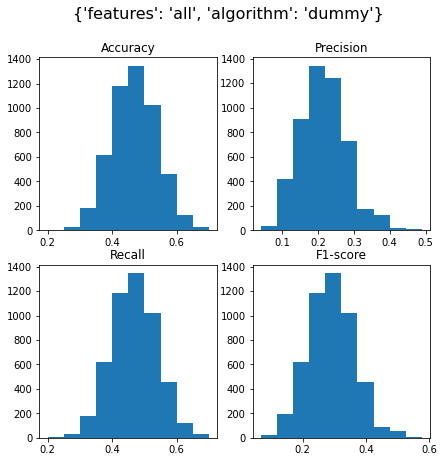

In [ ]:
# SCENARIO 01

## Runnig the model
scenario = scenarios[0]
scen_0 = pd.DataFrame(run_model(df, scenario, target))

## Calling hist_model
scen = scen_0 
hist_model(scen)



🔶 Aproximadamente 50% dados foi previsto corretamente

🔶 Aproximadamente 20% dos positivos previstos estavam corretos

🔶 Aproximadamente 50% dos dados positivos foram previstos pelo algoritmo

🔶 Aproximadamente 30% dos dados positivos do dataframe e previstos estavam corretos

🔶 O dummy classifier irá ver qual atritbuto é mais frequente no treinamento e irá realizar a predição a partir desse dado. 

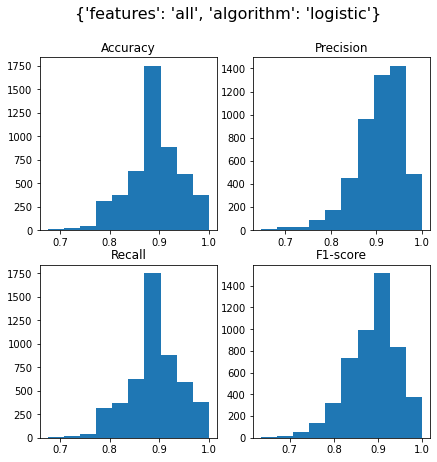

In [ ]:
# SCENARIO 02

## Runnig the model
scenario = scenarios[1]
scen_1 = pd.DataFrame(run_model(df, scenario, target))

## Calling hist_model
scen = scen_1 
hist_model(scen)

🔶 Aproximadamente 90% dados foi previsto corretamente

🔶 Aproximadamente 95% dos positivos previstos estavam corretos

🔶 Aproximadamente 90% dos dados positivos foram previstos pelo algoritmo

🔶 Aproximadamente 95% dos dados positivos do dataframe e previstos estavam corretos

🔶 A regressão logística irá analisar a relação entre os atributos e calcular a probabilidade do tipo de tratamento prescrito a partir disso. 

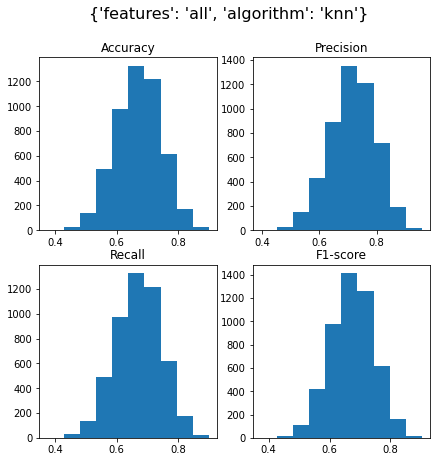

In [ ]:
# SCENARIO 03

## Runnig the model
scenario = scenarios[2]
scen_3 = pd.DataFrame(run_model(df, scenario, target))

## Calling hist_model
scen = scen_3
hist_model(scen)

🔶 Aproximadamente 65% dados foi previsto corretamente

🔶 Aproximadamente 65% dos positivos previstos estavam corretos

🔶 Aproximadamente 65% dos dados positivos foram previstos pelo algoritmo

🔶 Aproximadamente 65% dos dados positivos do dataframe e previstos estavam corretos

🔶 O KNN irá analisar a similaridade entre os atributos e utilizar essas características semelhantes/próximas para classificar o tipo de tratamento. 

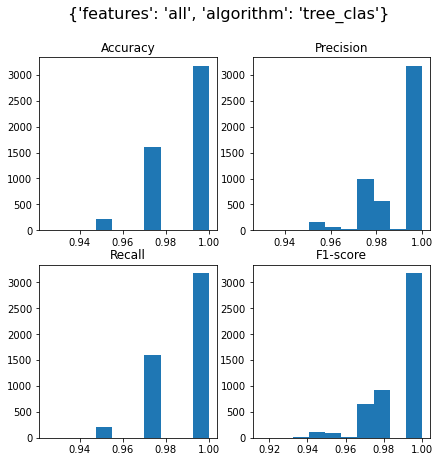

In [ ]:
# SCENARIO 04

## Runnig the model
scenario = scenarios[3]
scen_4 = pd.DataFrame(run_model(df, scenario, target))

## Calling hist_model
scen = scen_4
hist_model(scen)

🔶 Aproximadamente 100% dados foi previsto corretamente

🔶 Aproximadamente 100% dos positivos previstos estavam corretos

🔶 Aproximadamente 100% dos dados positivos foram previstos pelo algoritmo

🔶 Aproximadamente 100% dos dados positivos do dataframe e previstos estavam corretos

🔶 Em situações como esta devemos analisar se o algoritmo apresentou overfitting(adequou muito bem os dados e terá problemas em generalizar).

🔶 A árvore de decisão (ID3) irá trabalhar de forma binária a análise (sim ou não) de cada atributo por meio do cálculo de entropia e ganho de informação. Cada nó dela representa um atributo e cada nó terá ramos, ou seja, divisões de sim ou não. Quando a árvore conseguir definir a saída, que seria a classificação, esse dados será chamado de folha da árvore. 

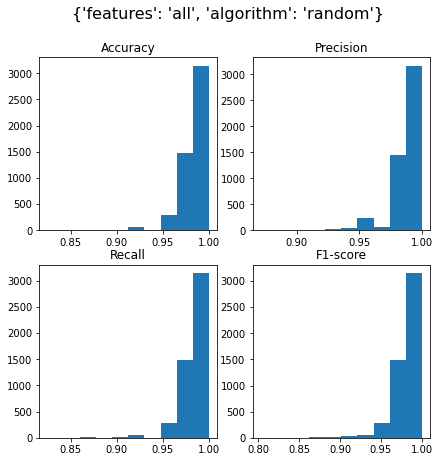

In [ ]:
# SCENARIO 05

## Runnig the model
scenario = scenarios[4]
scen_4 = pd.DataFrame(run_model(df, scenario, target))

## Calling hist_model
scen = scen_4
hist_model(scen)

🔶 Aproximadamente 100% dados foi previsto corretamente

🔶 Aproximadamente 100% dos positivos previstos estavam corretos

🔶 Aproximadamente 100% dos dados positivos foram previstos pelo algoritmo

🔶 Aproximadamente 100% dos dados positivos do dataframe e previstos estavam corretos

🔶 Em situações como esta devemos analisar se o algoritmo memorizou os dados (overfitting), 
algo frequente em árvores de decisão.

🔶 O random Forest Classifier consiste em diversas árvores de decisão operando em conjunto, logo, o modo como os dados serão analisados segue os mesmos hiperparâmetros. O benefício dele algoritmo é que as árvores irão auxiliar umas às outras para evitar erros individuais, quando diversos.

In [ ]:
# Metrics from the better result >> logistic regression
scen_1.mean()

Accuracy     0.891255
Precision    0.906716
Recall       0.891255
F1-score     0.889155
dtype: float64

🔶 Nessa primeira análise, sem realizar tuning dos modelos, a melhor performance foi com regressão logística, que apresentou uma acurácia de 89%.

## Conclusões e próximos passos

* A meta é compreender quando realizaremos o menor números de erros, logo, utilizarei como métrica para definição de performance a acurácia.
* O modelo com melhor performance foi regressão logística, com resultado de 89% do tratamento corretamente previsto.
* Este é um bom resultado para um MVP 😃
* Como próximos passo, priorizaria o tunig da árvore de decisão e random forest, incluindo análise de overfitting.
* Calcular ANOVA para analisar correlação de variáveis ou feature importance para analisar importância das features para o modelo.
* Aplicar balanceamento dos dados, exemplo SMOTE.
* Assim que possível, inserir análise das doses para buscarmos maior granularidade dos dados e segurança no apoio à prescrição dos medicamentos.

## Referências
https://pebmed.com.br/consumo-de-sodio-e-potassio-e-risco-cardiovascular/

https://ilumeo.com.br/todos-posts/2020/06/22/um-tour-pelos-10-principais-algoritmos-de-machine-learning

https://ankitnitjsr13.medium.com

https://towardsdatascience.com/understanding-random-forest-58381e0602d2


